# Introduction

Although math is the core business in physics and astrophysics, not many can easily convert numbers and eqautions into a coherent picture. Therefore we plot, we plot we plot we plot.

This is not always an exact science, for example how many bins to use? I guess such that the statistics make sense (nr in each bin), the plot looks pretty, and your message is conveyed as best as possible.


Disclaimer: 

There are many ways to make the same plot in matplotlib. There are many ways to bin your data within matplotlib or python. 

1 - We deliberately chose to use the subplots routine even when creating single figure. This because many only forums work in the same syntax. Furthermore it means you do not have to learn two types of syntax when creating either a single or multiple panel figure.

2 - We chose to do the binning within the numpy/array environment instead of inbuilt functions such as plt.hist / axes.hist. The reason is that you have more control over what you do, such as normalising in different ways (rates,weights,pdf). It forces you to know what you are calculating while also being able to check inbetween steps with print statements.  Once you know how to bin your data this way you can also easily expand these routines for more complicated plots (2D binning)

# Path to be set by user


In [1]:
pathToData = '/home/cneijssel/Desktop/Test/COMPAS_output.h5'

# Imports

In [2]:
#python libraries
import numpy as np               #for handling arrays
import h5py as h5                #for reading the COMPAS data
import matplotlib.pyplot as plt  #for plotting purposes

# Get some data to plot

In [3]:

Data  = h5.File(pathToData)
#DCOs = double compact objects
DCOs = Data['DoubleCompactObjects']
print(DCOs.keys())
M1   = DCOs['Mass_1'][()]
M2   = DCOs['Mass_2'][()]
Mtot = np.add(M1, M2)
Data.close()

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'ID', 'MT_Case_1', 'MT_Case_2', 'Mass_1', 'Mass_2', 'Merges_Hubble_Time', 'Recycled_NS_1', 'Recycled_NS_2', 'SEED', 'Separation@DCO', 'Stellar_Type_1', 'Stellar_Type_2', 'Time']>


# Histogram

In [4]:
#You can use numpy to create an array with specific min, max and interval values

minMtot = 0.
maxMtot = 100.
nBins   = 50

#Nr of bin edges is one more than number of bins
binEdges = np.linspace(minMtot, maxMtot, nBins+1)
#what is the value at the center of the bin?
#add each edge of the side of the bin and divide by 2
xvaluesHist  = (binEdges[1:] + binEdges[:-1])/2.
#what is the width of each bin? (array not single number)
binWidths = np.diff(binEdges)
print(len(xvaluesHist))

#do the binning to get yvalues

#create an array of y-values for each x-value
yvalues = np.zeros(len(xvaluesHist))

#for the number of bins bin the Data.
for nr in range(nBins):
    mask = (Mtot >= binEdges[nr]) & (Mtot < binEdges[nr+1])
    yvalues[nr] = np.sum(mask)

#because you have all the information you can adjust the yvalues
#yourself depending on what you want
    

##if you want to know the number per bin-width so you can do dy/dx as label
dYdXHist = np.divide(yvalues, binWidths)
##if you want to normalise
#yvalues = np.divide(yvalues, np.sum(yvalues))
#you can multiply by whatever you want (later this would be rates/weights etc)


50


# CDF

In [5]:
#how many points have a value below a number (normalised)

#sort the values of interest
MtotSorted = np.sort(Mtot)
#These values are your xvalues 
xvaluesCDF = MtotSorted

yvalues1 = np.zeros(len(xvaluesCDF))
#two ways 
# old for loop way
counter = 0
for i in range(len(xvaluesCDF)):
    counter+=1
    yvalues1[i] = counter
#inbuilt numpy
yvalues2 = np.ones(len(xvaluesCDF))
yvalues2 = np.cumsum(yvalues2)

#show it is the same
print(np.array_equal(yvalues1, yvalues2))


#now normalise such that it reaches 1
CDF = np.divide(yvalues2, float(np.sum(yvalues2)))

True


# A two panel plot

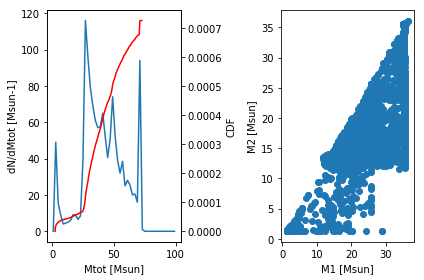

In [6]:
#I want two panels over in 1 row , so two columns
fig, axes = plt.subplots(1,2)

#axes is an array relating to each panel
#panel1 = axes[0]
#panel2 = axes[1]
#commonly people online just write axes[0] so I do that too

#I want the Histogram in the left panel
axes[0].plot(xvaluesHist, dYdXHist)
axes[0].set_xlabel('Mtot [Msun]')
axes[0].set_ylabel('dN/dMtot [Msun-1]')

# I also want the CDF in the same plot, but 
#on a different yaxis, with the same xaxis
CDFAxes =  axes[0].twinx()
CDFAxes.plot(xvaluesCDF, CDF, c='r')
#dont have to do xlabel since they are the same
CDFAxes.set_ylabel('CDF')


# I want to scatter M1 M2 in the right panel
axes[1].scatter(M1, M2)
axes[1].set_xlabel('M1 [Msun]')
axes[1].set_ylabel('M2 [Msun]')

#you can force plt to pad enough between plots
#such that the labels fit
plt.tight_layout()
#if you want to save the figure (always do )
#plt.savefig(pathToSave)


#finally show
plt.show()